In [1]:
import importlib
import movies
import data_describe

importlib.reload(movies)

MoviesKG = movies.MoviesKG
DataDescribe = data_describe.DataDescribe


import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats("svg")

In [2]:
# movies_kg.filtered_data[0]["movie"]

NameError: name 'movies_kg' is not defined

In [ ]:
# # 创建实例并保存数据到JSON文件
# movies_kg = MoviesKG(download=True)
# movies_kg.save_to_json()

movies_kg = MoviesKG()
movies_kg.filter_data()
movies_kg.build_graph()

Building graph:   0%|          | 0/2000 [00:00<?, ?it/s]


ClientError: [Statement.SemanticError] Cannot merge the following node because of null property value for 'imdb_id': (:Movie {imdb_id: null})

In [ ]:
for data in movies_kg.filtered_data:
    print(data["movie"]["imdb_id"])

tt22022452
tt11389872
tt4919268
tt13964390
tt14539740
tt2096673
tt21364552
tt17279496
tt20201212
tt14856980
tt14088510
tt20215968
tt1684562
tt1502397
tt16427902
tt21692408
tt17351056
tt12037194
tt31869664
tt18829674
tt5672290
tt15239678
tt23289160
tt32355576
tt5779228
tt29485013
tt0112442
tt20726444
tt29259099
tt6495056
tt3508936
tt19766560
tt26736843
tt23137390
tt16253418
tt13923084
tt13932976
tt5765240
tt0172156
tt22813112
tt21909764
tt0295701
tt14759062
tt26785742
tt10442352
tt23137904
tt3359350
tt11225626
tt20168564
tt30129599
tt15895490
tt21301418
tt32268303
tt11152168
tt4941804
tt7510222
tt20112746
tt27487473
tt6263850
None
None
tt11057302
tt21235248
tt9466114
tt11304740
tt27489557
tt23330554
tt5433140
tt11027510
tt26439204
tt1160419
tt28768831
tt6166392
tt31122323
tt27534328
tt12774526
tt15789038
tt0816692
tt27304026
tt32459973
tt8097030
tt15398776
tt30319826
tt19766466
tt26684398
tt6718170
tt12672620
tt16426418
tt5090568
tt13434866
tt23789884
tt32375562
tt2103281
tt13452446
tt2

In [ ]:
movies_kg.filtered_data[0]

{'movie': {'belongs_to_collection': 'Inside Out Collection',
  'budget': 200000000,
  'origin_country': ['US'],
  'imdb_id': 'tt22022452',
  'overview': "Teenager Riley's mind headquarters is undergoing a sudden demolition to make room for something entirely unexpected: new Emotions! Joy, Sadness, Anger, Fear and Disgust, who’ve long been running a successful operation by all accounts, aren’t sure how to feel when Anxiety shows up. And it looks like she’s not alone.",
  'release_date': '2024-06-11',
  'revenue': 110800000,
  'runtime': 97,
  'tagline': 'Make room for new emotions.'},
 'genres': ['Animation', 'Family', 'Drama', 'Adventure', 'Comedy'],
 'production_companies': [{'id': 3, 'name': 'Pixar', 'origin_country': 'US'},
  {'id': 2, 'name': 'Walt Disney Pictures', 'origin_country': 'US'}],
 'crew': [{'id': 182001, 'name': 'Kelsey Mann', 'job': 'Director'},
  {'id': 8103, 'name': 'Mark Nielsen', 'job': 'Producer'},
  {'id': 12890, 'name': 'Pete Docter', 'job': 'Executive Producer'

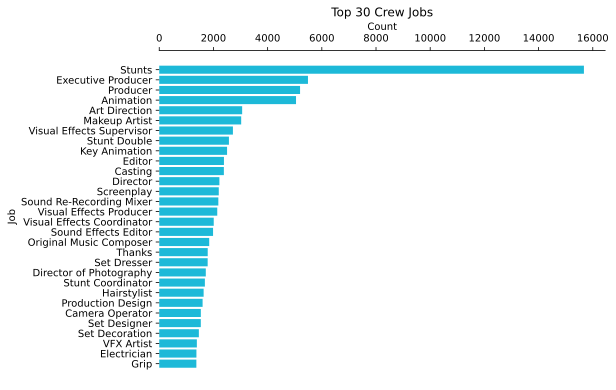

In [ ]:
data = DataDescribe(movies_kg.movies_detailed)
data.plot_crew()

In [ ]:
movies_kg.filtered_data[0]

{'movie': {'belongs_to_collection': 'Inside Out Collection',
  'budget': 200000000,
  'origin_country': ['US'],
  'imdb_id': 'tt22022452',
  'overview': "Teenager Riley's mind headquarters is undergoing a sudden demolition to make room for something entirely unexpected: new Emotions! Joy, Sadness, Anger, Fear and Disgust, who’ve long been running a successful operation by all accounts, aren’t sure how to feel when Anxiety shows up. And it looks like she’s not alone.",
  'release_date': '2024-06-11',
  'revenue': 110800000,
  'runtime': 97,
  'tagline': 'Make room for new emotions.'},
 'genres': ['Animation', 'Family', 'Drama', 'Adventure', 'Comedy'],
 'production_companies': [{'id': 3, 'name': 'Pixar', 'origin_country': 'US'},
  {'id': 2, 'name': 'Walt Disney Pictures', 'origin_country': 'US'}],
 'crew': [{'id': 182001, 'name': 'Kelsey Mann', 'job': 'Director'},
  {'id': 8103, 'name': 'Mark Nielsen', 'job': 'Producer'},
  {'id': 12890, 'name': 'Pete Docter', 'job': 'Executive Producer'

In [ ]:
movies_kg.movies_detailed[0]

{'adult': False,
 'backdrop_path': '/stKGOm8UyhuLPR9sZLjs5AkmncA.jpg',
 'belongs_to_collection': {'id': 1022790,
  'name': 'Inside Out Collection',
  'poster_path': '/Apr19lGxP7gm6y2HQX0kqOXTtqC.jpg',
  'backdrop_path': '/7U2m2dMSIfHx2gWXKq78Xj1weuH.jpg'},
 'budget': 200000000,
 'genres': [{'id': 16, 'name': 'Animation'},
  {'id': 10751, 'name': 'Family'},
  {'id': 18, 'name': 'Drama'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 35, 'name': 'Comedy'}],
 'homepage': 'https://movies.disney.com/inside-out-2',
 'id': 1022789,
 'imdb_id': 'tt22022452',
 'origin_country': ['US'],
 'original_language': 'en',
 'original_title': 'Inside Out 2',
 'overview': "Teenager Riley's mind headquarters is undergoing a sudden demolition to make room for something entirely unexpected: new Emotions! Joy, Sadness, Anger, Fear and Disgust, who’ve long been running a successful operation by all accounts, aren’t sure how to feel when Anxiety shows up. And it looks like she’s not alone.",
 'popularity': 4974.9,

In [ ]:
movies_kg.movies_detailed[0]["credits"]["cast"]

[{'adult': False,
  'gender': 1,
  'id': 56322,
  'known_for_department': 'Acting',
  'name': 'Amy Poehler',
  'original_name': 'Amy Poehler',
  'popularity': 26.804,
  'profile_path': '/rwmvRonpluV6dCPiQissYrchvSD.jpg',
  'cast_id': 4,
  'character': 'Joy (voice)',
  'credit_id': '631bd7450bb076007b78d023',
  'order': 0},
 {'adult': False,
  'gender': 1,
  'id': 1903874,
  'known_for_department': 'Acting',
  'name': 'Maya Hawke',
  'original_name': 'Maya Hawke',
  'popularity': 34.327,
  'profile_path': '/evjbbHM1bzA6Ma5Ptjwa4WkYkkj.jpg',
  'cast_id': 7,
  'character': 'Anxiety (voice)',
  'credit_id': '654ce72cd4653700c4e31b8c',
  'order': 1},
 {'adult': False,
  'gender': 1,
  'id': 3020876,
  'known_for_department': 'Acting',
  'name': 'Kensington Tallman',
  'original_name': 'Kensington Tallman',
  'popularity': 16.408,
  'profile_path': '/tBqawwg2VJq1V4mZjAOFQ7fnXNW.jpg',
  'cast_id': 51,
  'character': 'Riley (voice)',
  'credit_id': '65eae45d5aba320186731060',
  'order': 2},
 {